**DEEP LEARNING CNN FOR 5000 IMAGE SAMPLES PER CLASS.**

# Import Data

In [ ]:
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras.utils as image
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense
from keras.layers import Dropout
from tensorflow.keras.regularizers import l2, l1_l2
from tensorflow.keras.regularizers import l1
import keras
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import LabelEncoder

**IMPORT IMAGE DATA FROM GOOGLE DRIVE CLOUD.**

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/"

'Colab Notebooks'   SEPR


# Define Confusion Matrix Function

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    #fig.tight_layout()
    return ax

In [ ]:
class_names=np.array(['bass', 'brass', 'flute', 'guitar',
             'keyboard', 'mallet', 'organ', 'reed',
             'string', 'vocal'])

# Import and Prepare Images

In [ ]:
#Define function to load images

def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))

    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)

x = []
y = []

In [ ]:
# Define constants
IMAGE_HEIGHT = 308
IMAGE_WIDTH = 775
TARGET_HEIGHT = 224
TARGET_WIDTH = 224
N_CHANNELS = 3

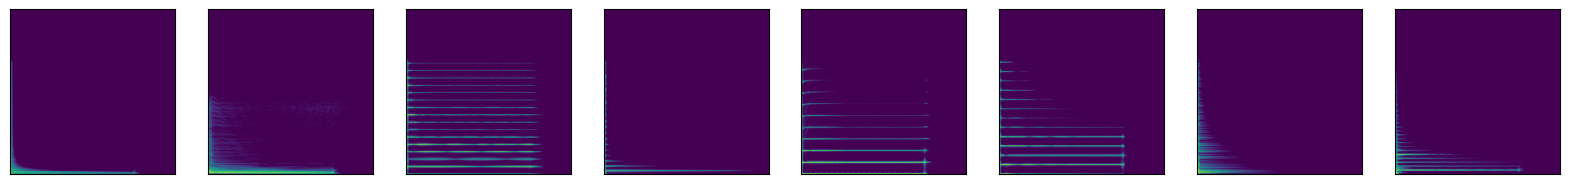

In [ ]:
images, labels = load_images_from_path('/content/drive/MyDrive/SEPR/Spectrogram Images/train5000_images/0', 0)
show_images(images)

x += images
y += labels

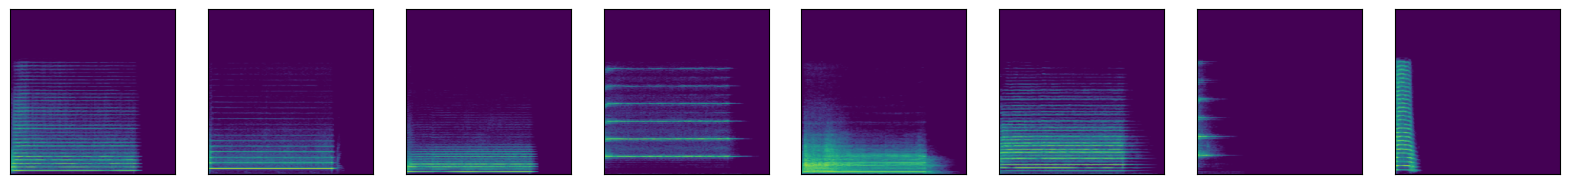

In [ ]:
images, labels = load_images_from_path('/content/drive/MyDrive/SEPR/Spectrogram Images/train5000_images/1', 1)
show_images(images)

x += images
y += labels

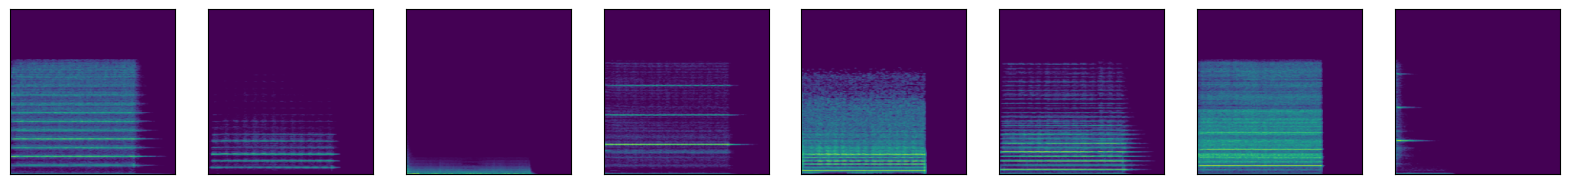

In [ ]:
images, labels = load_images_from_path('/content/drive/MyDrive/SEPR/Spectrogram Images/train5000_images/2', 2)
show_images(images)

x += images
y += labels

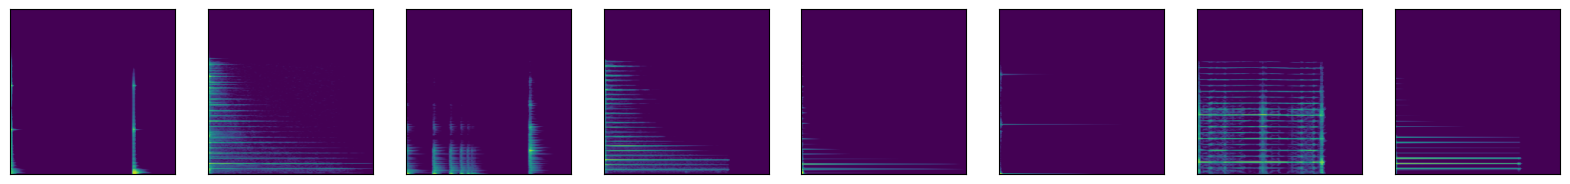

In [ ]:
images, labels = load_images_from_path('/content/drive/MyDrive/SEPR/Spectrogram Images/train5000_images/3', 3)
show_images(images)

x += images
y += labels

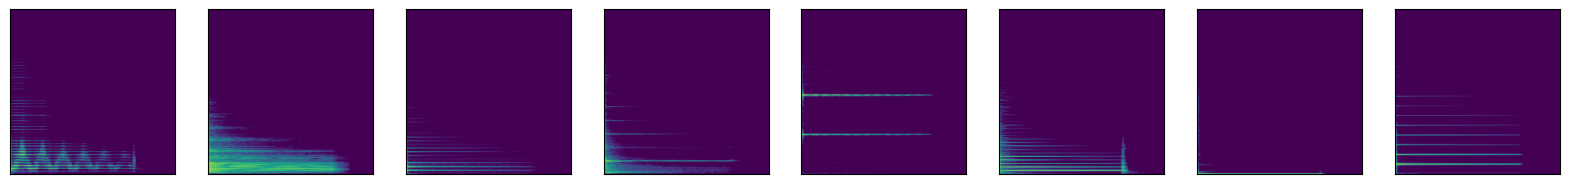

In [ ]:
images, labels = load_images_from_path('/content/drive/MyDrive/SEPR/Spectrogram Images/train5000_images/4', 4)
show_images(images)

x += images
y += labels

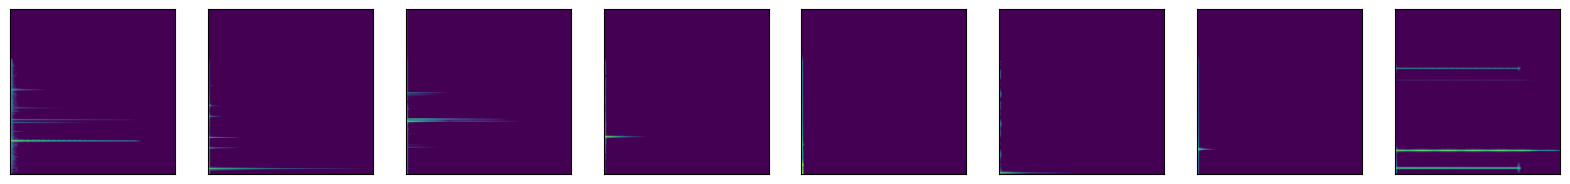

In [ ]:
images, labels = load_images_from_path('/content/drive/MyDrive/SEPR/Spectrogram Images/train5000_images/5', 5)
show_images(images)

x += images
y += labels

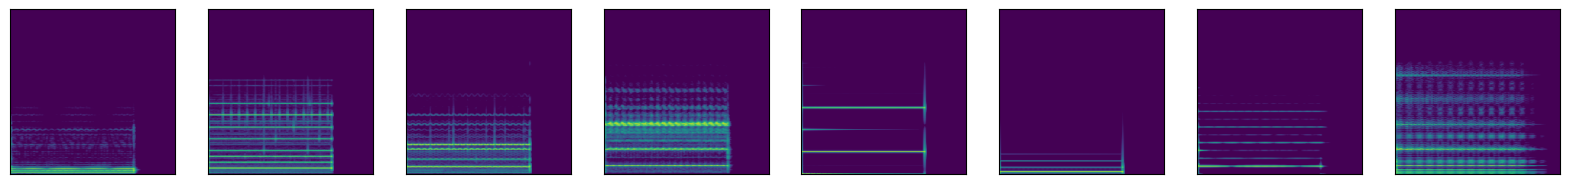

In [ ]:
images, labels = load_images_from_path('/content/drive/MyDrive/SEPR/Spectrogram Images/train5000_images/6', 6)
show_images(images)

x += images
y += labels

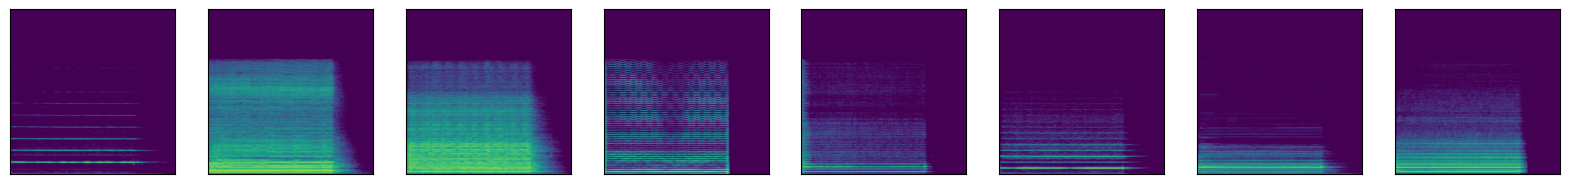

In [ ]:
images, labels = load_images_from_path('/content/drive/MyDrive/SEPR/Spectrogram Images/train5000_images/7', 7)
show_images(images)

x += images
y += labels

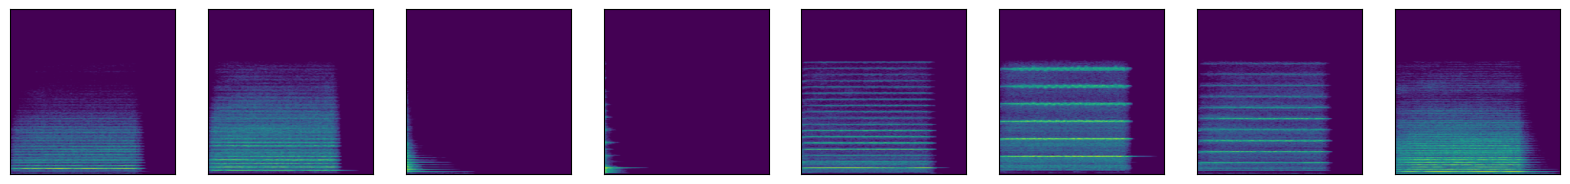

In [ ]:
images, labels = load_images_from_path('/content/drive/MyDrive/SEPR/Spectrogram Images/train5000_images/8', 8)
show_images(images)

x += images
y += labels

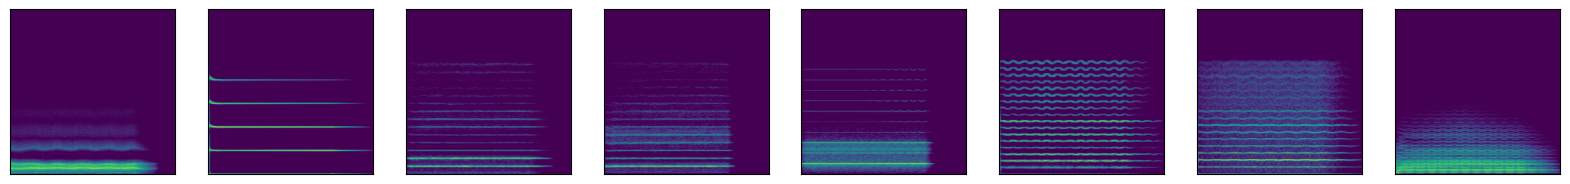

In [ ]:
images, labels = load_images_from_path('/content/drive/MyDrive/SEPR/Spectrogram Images/train5000_images/10', 9)
show_images(images)

x += images
y += labels

# Prepare X and y Data for the Model

In [ ]:
label_encoder = LabelEncoder()

X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    stratify=y,
                                                    test_size=0.05,
                                                    random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(x, y,
                                                  stratify=y,
                                                  test_size=0.1,
                                                  random_state=42)

X_train_norm = np.array(X_train) / 255
X_test_norm = np.array(X_test) / 255
X_valid_norm = np.array(X_valid) / 255


y_train_encoded = label_encoder.fit_transform(y_train)
y_valid_encoded = label_encoder.transform(y_valid)
y_test_encoded = label_encoder.transform(y_test)

# One-hot encode the target variable
y_train_one_hot = to_categorical(y_train_encoded)
y_valid_one_hot = to_categorical(y_valid_encoded)
y_test_one_hot = to_categorical(y_test_encoded)

In [ ]:
y_train_one_hot.shape

(45000, 10)

In [ ]:
y_valid_one_hot.shape

(5000, 10)

In [ ]:
y_test_one_hot.shape

(2500, 10)

In [ ]:
# Define number of classes
num_classes = len(set(y_train))
print(num_classes)

10



# CNN Model

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='elu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=keras.regularizers.l2(0.02)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='elu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.02)))
model.add(Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l1(0.01)))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='elu'))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     36992     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
hist = model.fit(X_train_norm,
                 y_train_one_hot,
                 validation_data=(X_valid_norm,
                                  y_valid_one_hot),
                 batch_size=256,
                 epochs=50)

Epoch 1/50
176/176 [==============================] - 847s 5s/step - loss: 10.8346 - accuracy: 0.3609 - val_loss: 1.6117 - val_accuracy: 0.5084
Epoch 2/50
176/176 [==============================] - 842s 5s/step - loss: 1.4089 - accuracy: 0.5681 - val_loss: 1.1911 - val_accuracy: 0.6450
Epoch 3/50
176/176 [==============================] - 848s 5s/step - loss: 1.1197 - accuracy: 0.6594 - val_loss: 1.0028 - val_accuracy: 0.6882
Epoch 4/50
176/176 [==============================] - 846s 5s/step - loss: 0.9582 - accuracy: 0.7181 - val_loss: 0.8300 - val_accuracy: 0.7690
Epoch 5/50
176/176 [==============================] - 850s 5s/step - loss: 0.8310 - accuracy: 0.7663 - val_loss: 0.7596 - val_accuracy: 0.7908
Epoch 6/50
176/176 [==============================] - 852s 5s/step - loss: 0.7344 - accuracy: 0.8008 - val_loss: 0.6640 - val_accuracy: 0.8306
Epoch 7/50
176/176 [==============================] - 851s 5s/step - loss: 0.6584 - accuracy: 0.8242 - val_loss: 0.5965 - val_accuracy: 0.849

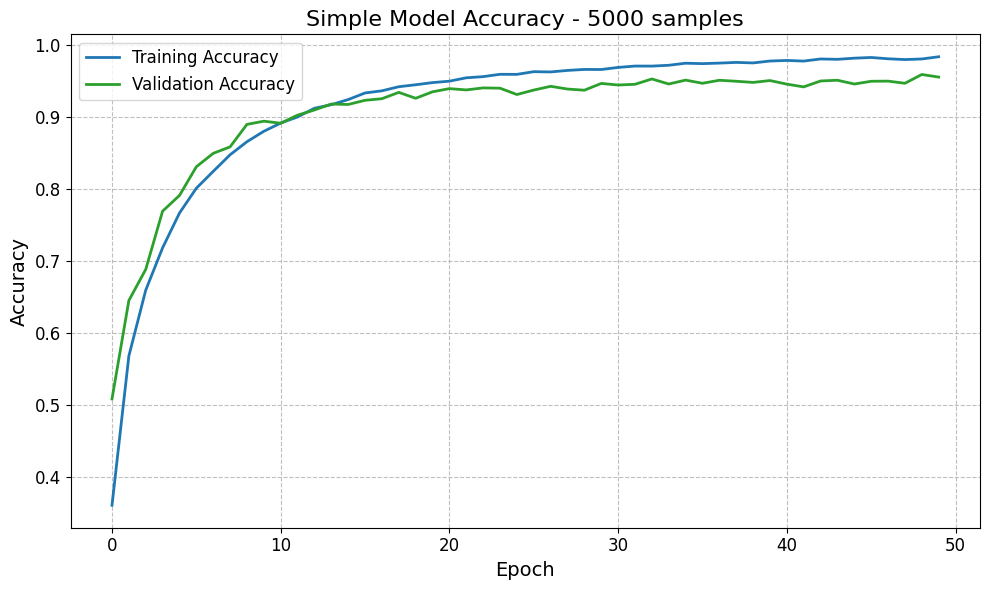

In [35]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot( hist.history['accuracy'], label='Training Accuracy', color='tab:blue', linewidth=2)
plt.plot( hist.history['val_accuracy'], label='Validation Accuracy', color='tab:green', linewidth=2)
plt.title('Simple Model Accuracy - 5000 samples', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

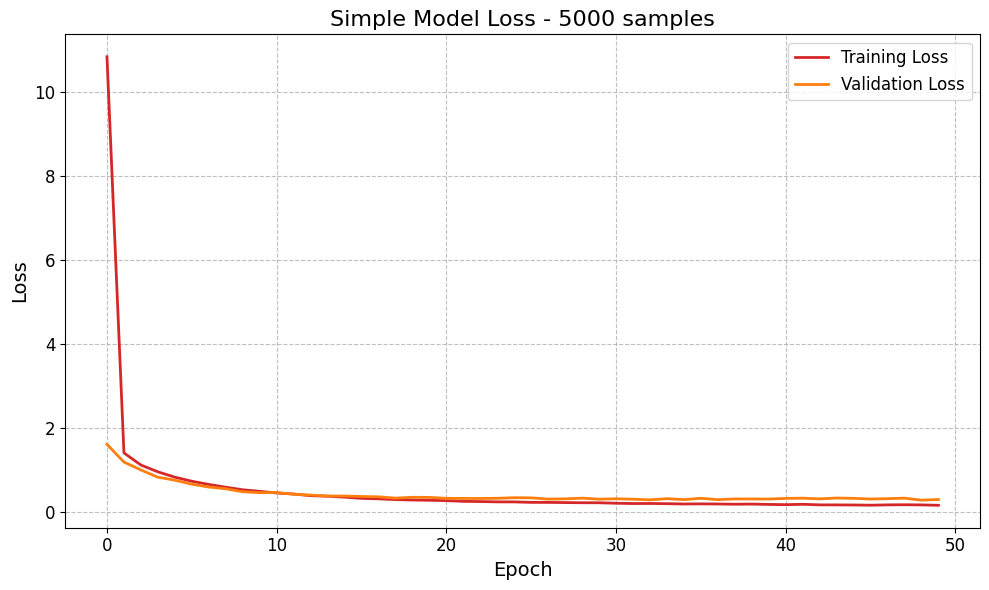

In [36]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(hist.history['loss'], label='Training Loss', color='tab:red', linewidth=2)
plt.plot(hist.history['val_loss'], label='Validation Loss', color='tab:orange', linewidth=2)
plt.title('Simple Model Loss - 5000 samples', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

In [29]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_norm, y_test_one_hot)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

79/79 [==============================] - 10s 126ms/step - loss: 0.2968 - accuracy: 0.9548
Test Accuracy: 95.48%


In [30]:
# Get predictions
y_pred_probs = model.predict(X_test_norm)
y_pred = np.argmax(y_pred_probs, axis=1)

79/79 [==============================] - 10s 120ms/step


Normalized confusion matrix
[[0.904 0.    0.    0.032 0.024 0.024 0.004 0.    0.004 0.008]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.004 0.    0.988 0.    0.    0.    0.    0.008 0.    0.   ]
 [0.04  0.    0.004 0.884 0.028 0.028 0.    0.    0.016 0.   ]
 [0.012 0.    0.    0.02  0.896 0.044 0.024 0.004 0.    0.   ]
 [0.016 0.    0.    0.016 0.004 0.944 0.004 0.004 0.004 0.008]
 [0.004 0.    0.004 0.    0.    0.    0.988 0.004 0.    0.   ]
 [0.    0.008 0.024 0.    0.004 0.    0.008 0.952 0.004 0.   ]
 [0.    0.    0.    0.    0.    0.004 0.    0.    0.996 0.   ]
 [0.004 0.    0.    0.    0.    0.    0.    0.    0.    0.996]]


<Axes: title={'center': 'CNN Model Normalized confusion matrix - 5000 samples'}, xlabel='Predicted label', ylabel='True label'>

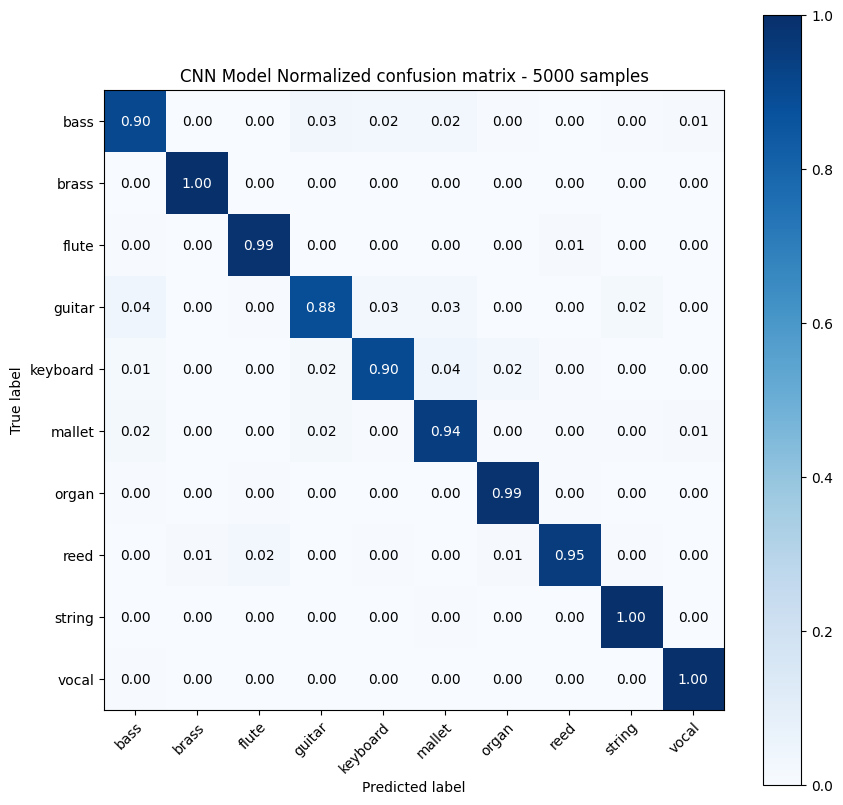

In [31]:
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='CNN Model Normalized confusion matrix - 5000 samples')

In [37]:
hist = model.fit(X_train_norm,
                 y_train_one_hot,
                 validation_data=(X_valid_norm,
                                  y_valid_one_hot),
                 batch_size=256,
                 epochs=20)

Epoch 1/20
176/176 [==============================] - 873s 5s/step - loss: 0.1594 - accuracy: 0.9823 - val_loss: 0.2963 - val_accuracy: 0.9512
Epoch 2/20
176/176 [==============================] - 874s 5s/step - loss: 0.1675 - accuracy: 0.9806 - val_loss: 0.3053 - val_accuracy: 0.9494
Epoch 3/20
176/176 [==============================] - 881s 5s/step - loss: 0.1573 - accuracy: 0.9840 - val_loss: 0.2930 - val_accuracy: 0.9568
Epoch 4/20
176/176 [==============================] - 882s 5s/step - loss: 0.1527 - accuracy: 0.9848 - val_loss: 0.2897 - val_accuracy: 0.9566
Epoch 5/20
176/176 [==============================] - 883s 5s/step - loss: 0.1544 - accuracy: 0.9848 - val_loss: 0.3045 - val_accuracy: 0.9514
Epoch 6/20
176/176 [==============================] - 882s 5s/step - loss: 0.1561 - accuracy: 0.9844 - val_loss: 0.3016 - val_accuracy: 0.9530
Epoch 7/20
176/176 [==============================] - 883s 5s/step - loss: 0.1586 - accuracy: 0.9837 - val_loss: 0.3038 - val_accuracy: 0.9524

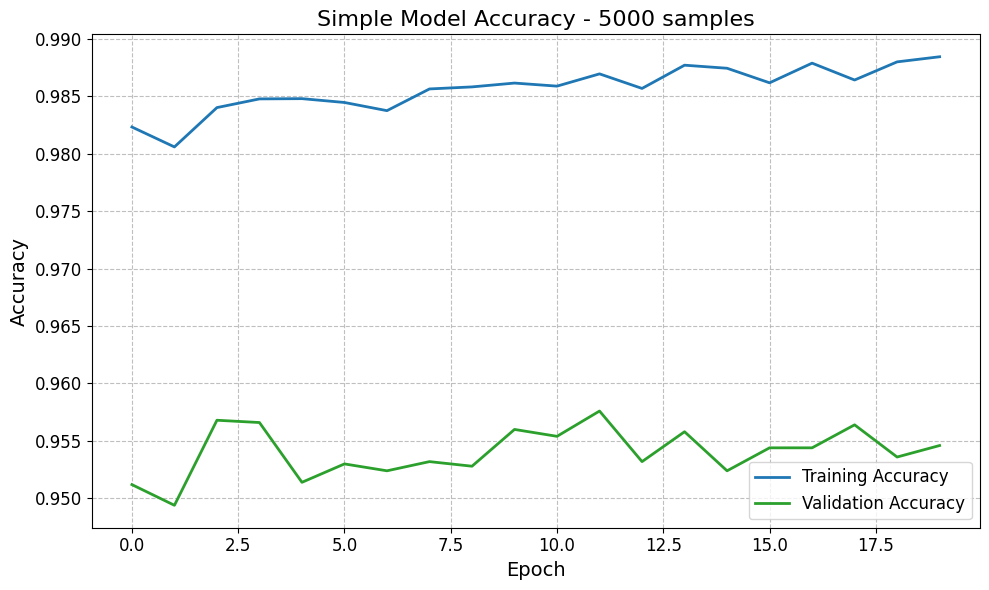

In [38]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot( hist.history['accuracy'], label='Training Accuracy', color='tab:blue', linewidth=2)
plt.plot( hist.history['val_accuracy'], label='Validation Accuracy', color='tab:green', linewidth=2)
plt.title('Simple Model Accuracy - 5000 samples', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

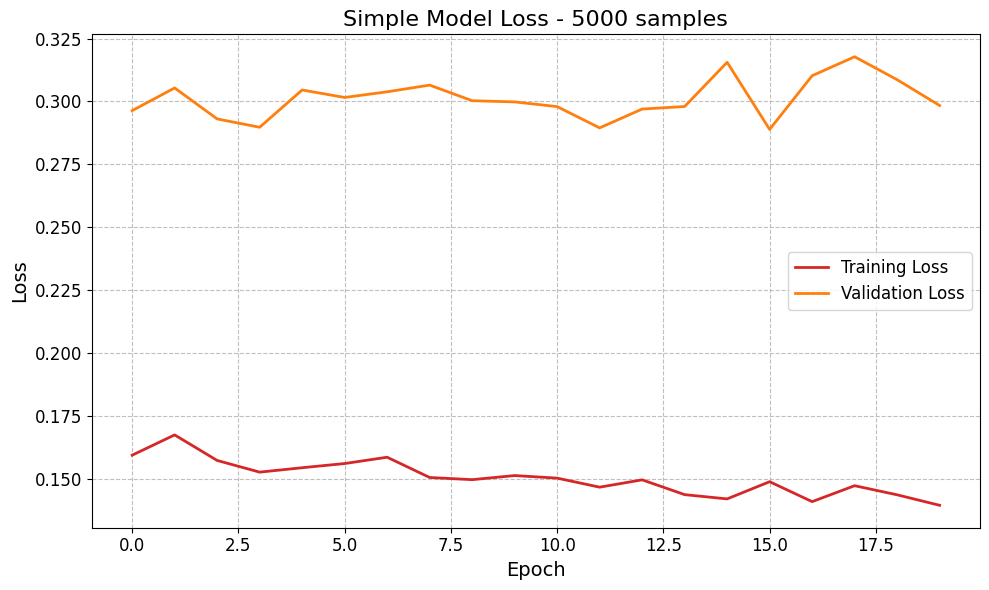

In [39]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(hist.history['loss'], label='Training Loss', color='tab:red', linewidth=2)
plt.plot(hist.history['val_loss'], label='Validation Loss', color='tab:orange', linewidth=2)
plt.title('Simple Model Loss - 5000 samples', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

In [41]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_norm, y_test_one_hot)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

79/79 [==============================] - 9s 116ms/step - loss: 0.2882 - accuracy: 0.9584
Test Accuracy: 95.84%
